Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

## Data Exploration

**TASK: Create a correlation heatmap.**

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

{'uci_id': 856, 'name': 'Higher Education Students Performance Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/856/data.csv', 'abstract': "The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict students' end-of-term performances using ML techniques.", 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 145, 'num_features': 31, 'feature_types': ['Integer'], 'demographics': ['Age', 'Sex', 'Education Level', 'Marital Status', 'Income', 'Occupation'], 'target_col': ['OUTPUT Grade'], 'index_col': ['Student ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51G82', 'creators': ['Nevriye Yilmaz', 'Boran Şekeroğlu'], 'intro_

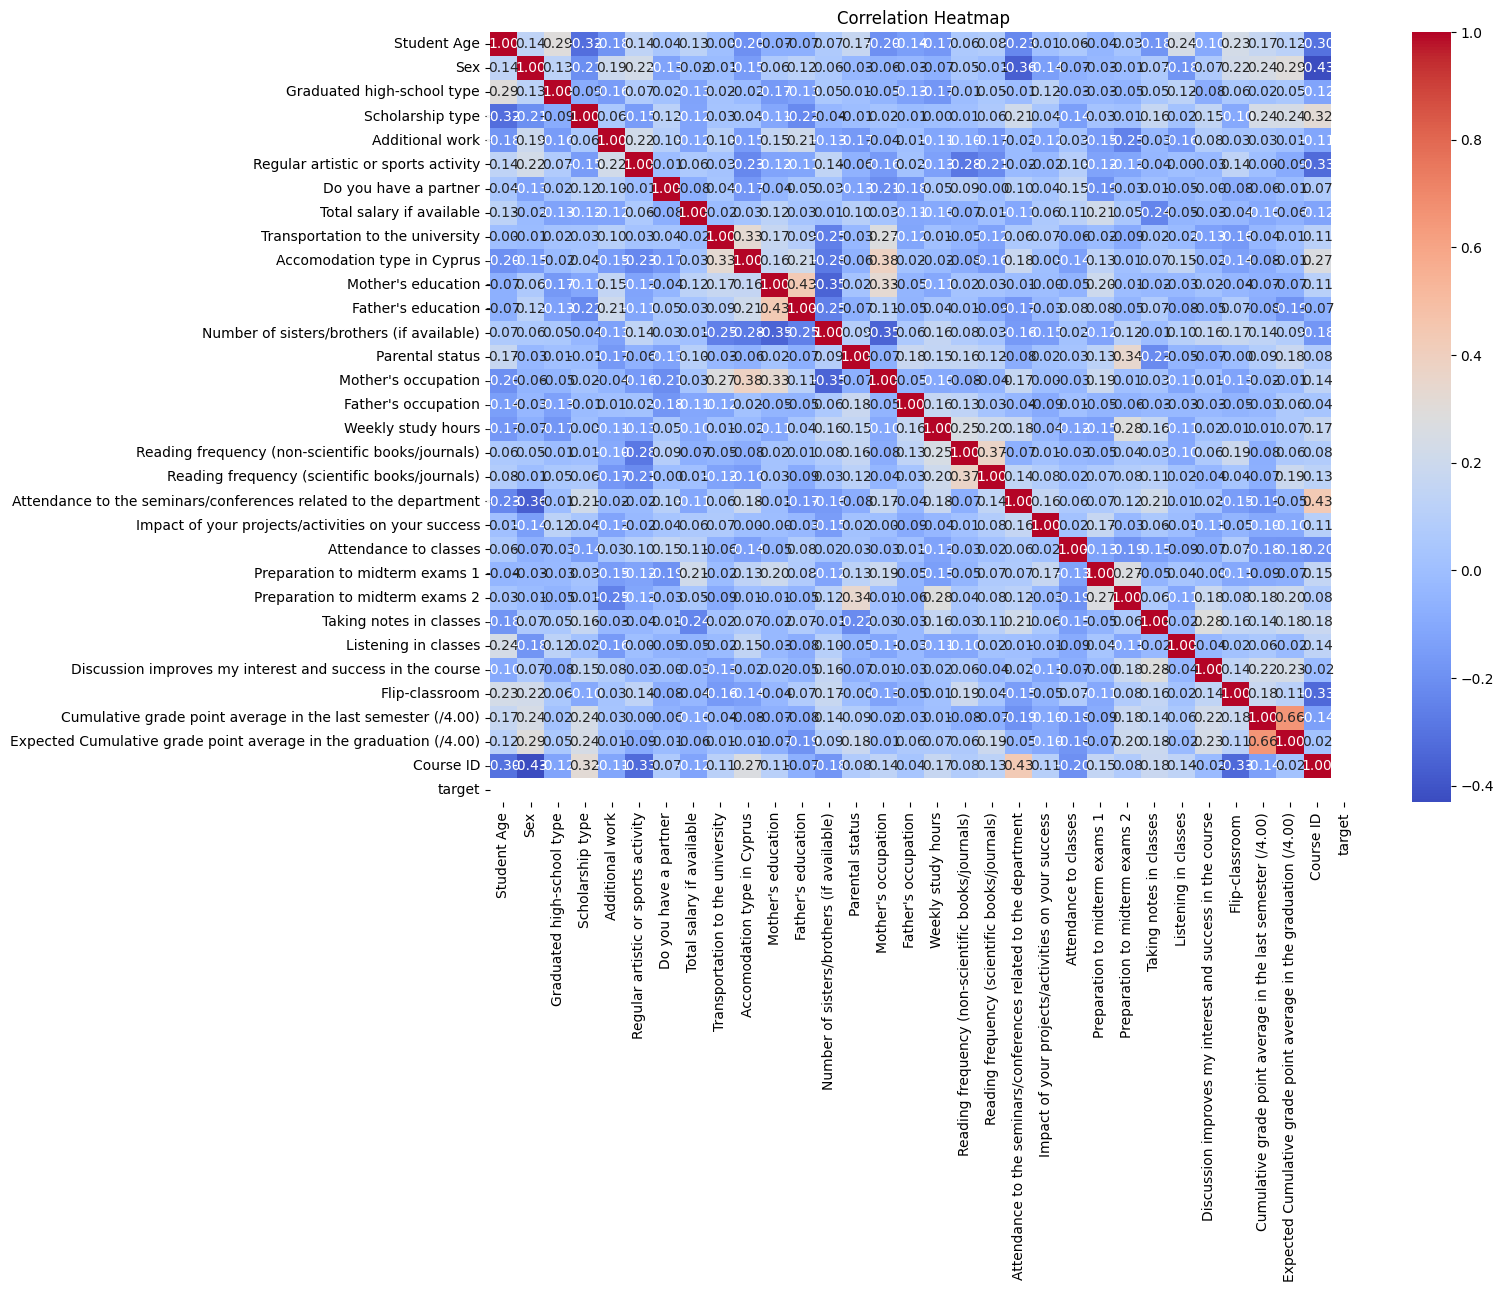

Top 5 features most correlated with the target:
Index(['Sex', 'Graduated high-school type', 'Scholarship type',
       'Additional work', 'Regular artistic or sports activity'],
      dtype='object')


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

higher_education_students_performance_evaluation = fetch_ucirepo(id=856)

X = higher_education_students_performance_evaluation.data.features
y = higher_education_students_performance_evaluation.data.targets

print(higher_education_students_performance_evaluation.metadata)
print(higher_education_students_performance_evaluation.variables)

print(X.head())
print(y.head())

target_column = y.columns[0]
print("Unique values in target:", y[target_column].unique())

y_binary = y[target_column].apply(lambda x: 1 if x == 'positive_class' else 0)

print("Converted binary target values:")
print(y_binary.head())

data = pd.concat([X, y_binary.rename('target')], axis=1)

correlation_matrix = data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

target_correlations = correlation_matrix['target'].abs().sort_values(ascending=False)

top_5_correlated_features = target_correlations.index[1:6]
print("Top 5 features most correlated with the target:")
print(top_5_correlated_features)


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.1, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 130
Test set size: 15


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'knn__n_neighbors': range(1, 21)}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'knn__n_neighbors': 1}
Best cross-validation accuracy: 1.00


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

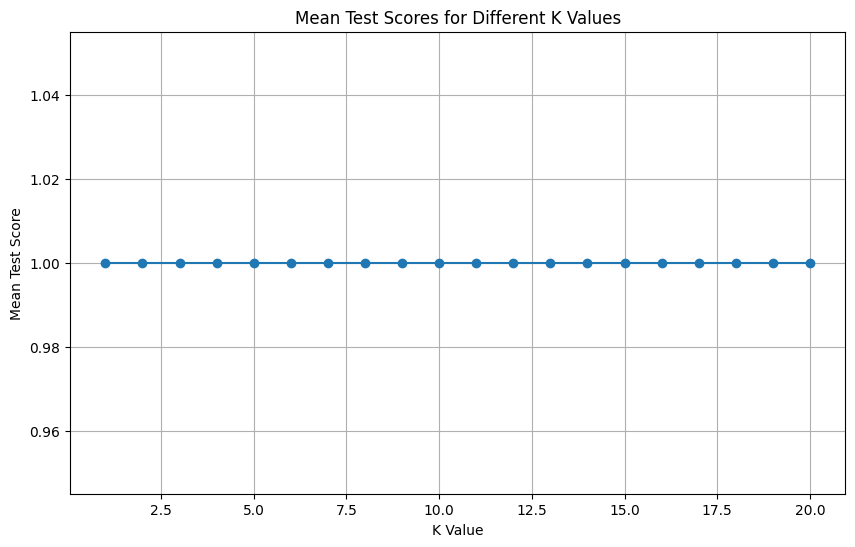

In [18]:
import matplotlib.pyplot as plt

mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = range(1, 21)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.title('Mean Test Scores for Different K Values')
plt.xlabel('K Value')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()


### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[15]]
